In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
wines=pd.read_csv('C:\\Users\\ROSHAN\\OneDrive\\Desktop\\Vs Code\\Python\\Projects\\E2E\\research\\winequality-red.csv')

wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
wines['chlorides']

0       0.073250
1       0.093490
2       0.088011
3       0.072321
4       0.073250
          ...   
1594    0.086178
1595    0.060154
1596    0.073250
1597    0.072321
1598    0.064851
Name: chlorides, Length: 1599, dtype: float64

In [4]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wines.shape

(1599, 12)

In [6]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

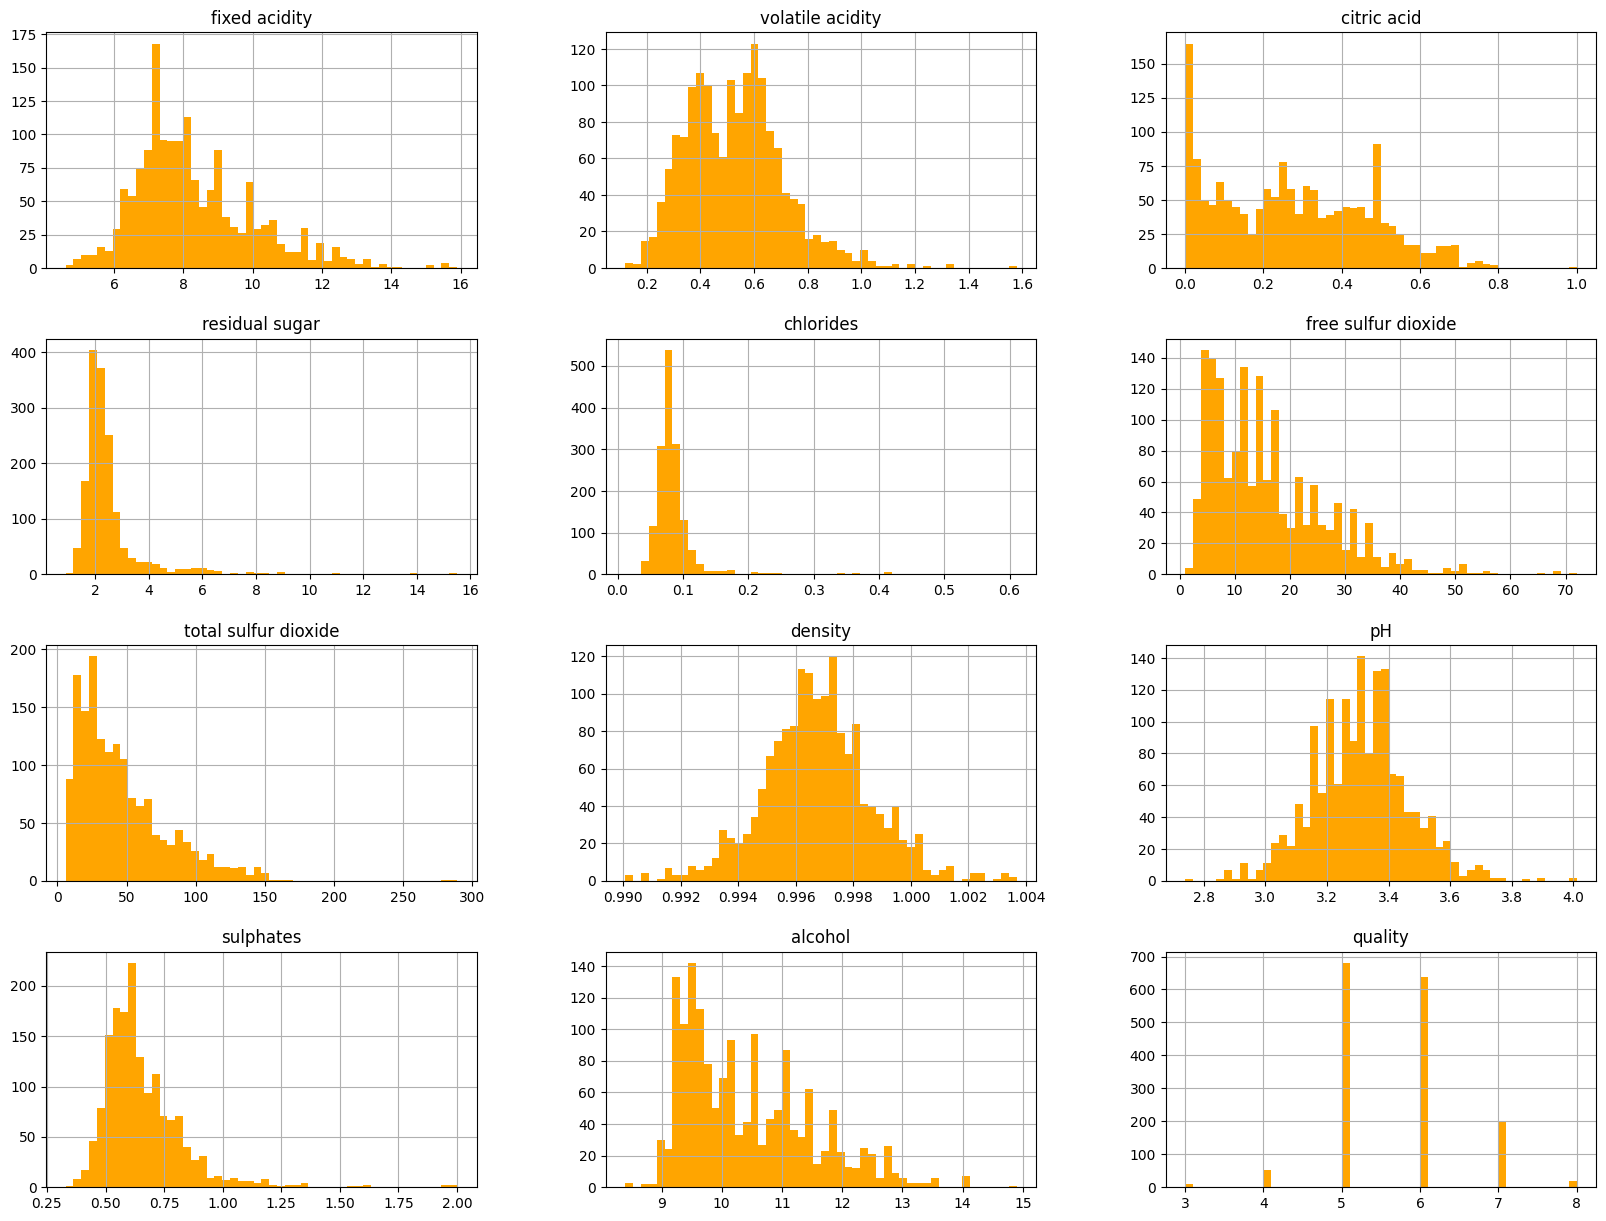

In [10]:
wines.hist(bins=50,figsize=(20,15),color='orange')
plt.savefig('plots.png')

In [11]:

transforms = {
    # log1p for strongly/right‑skewed
    "fixed acidity":    np.log1p,
    "volatile acidity": np.log1p,
    "citric acid":      np.log1p,
    "residual sugar":   np.log1p,
    "chlorides":        np.log1p,
    "free sulfur dioxide":  np.log1p,
    "total sulfur dioxide": np.log1p,
    # optional sqrt/log1p
    "sulphates":        np.sqrt,
    "alcohol":          np.sqrt,
    # the nearly‑normal ones we just leave alone
    # "density", "pH"  → no entry here
}

for col, func in transforms.items():
    wines[col] = func(wines[col])



array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

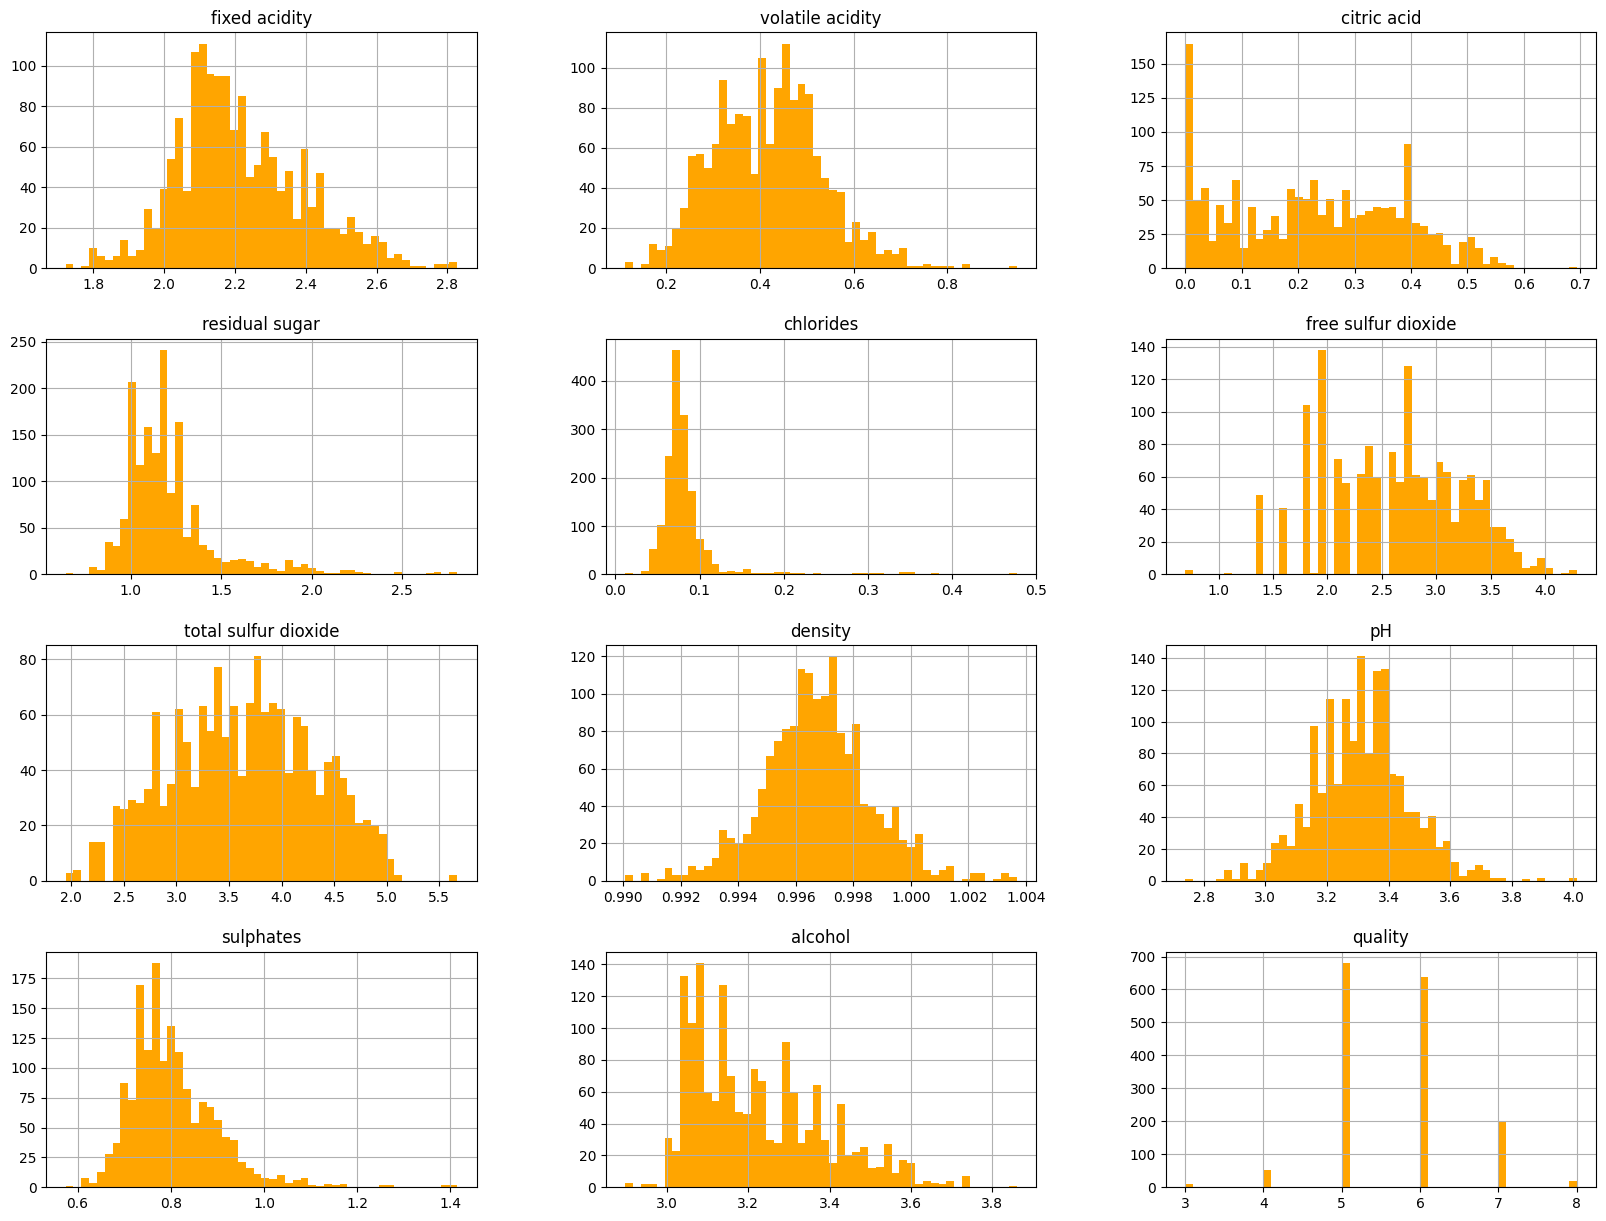

In [12]:
wines.hist(bins=50,figsize=(20,15),color='orange')

In [18]:
wines[::].skew()


fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.087506
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.554542
alcohol                 0.758751
quality                 0.217802
dtype: float64

In [25]:
X=wines.drop('quality',axis=1)
y=wines['quality']

In [26]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.748331,3.065942
1,2.174752,0.631272,0.000000,1.280934,0.093490,3.258097,4.219508,0.9968,3.20,0.824621,3.130495
2,2.174752,0.565314,0.039221,1.193922,0.088011,2.772589,4.007333,0.9970,3.26,0.806226,3.130495
3,2.501436,0.246860,0.444686,1.064711,0.072321,2.890372,4.110874,0.9980,3.16,0.761577,3.130495
4,2.128232,0.530628,0.000000,1.064711,0.073250,2.484907,3.555348,0.9978,3.51,0.748331,3.065942


In [27]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
493,2.272126,0.524729,0.270027,1.386294,0.082501,3.178054,4.406719,1.00020,3.48,0.860233,3.405877
354,1.960095,0.190620,0.336472,0.875469,0.063913,3.725693,5.111988,0.99120,3.25,0.768115,3.449638
342,2.476538,0.329304,0.385262,1.029619,0.111541,1.945910,2.708050,0.99820,3.30,0.866025,3.130495
834,2.282382,0.521766,0.231112,0.955511,0.084341,2.833213,3.178054,0.99694,3.32,0.685565,3.065942
705,2.240710,0.710496,0.139762,1.945910,0.070458,2.484907,4.007333,0.99900,3.37,0.700000,3.146427
...,...,...,...,...,...,...,...,...,...,...,...
1130,2.312535,0.470004,0.000000,1.064711,0.056380,1.791759,2.397895,0.99770,3.18,0.793725,3.224903
1294,2.219203,0.491643,0.095310,1.131402,0.070458,3.258097,4.110874,0.99638,3.29,0.866025,3.301515
860,2.104134,0.482426,0.058269,1.308333,0.074179,2.772589,4.454347,0.99746,3.51,0.734847,3.082207
1459,2.186051,0.182322,0.300105,0.993252,0.052592,2.079442,2.772589,0.99458,3.32,0.894427,3.449638


In [30]:
from sklearn.preprocessing import StandardScaler

In [37]:
from sklearn.linear_model import ElasticNet

lr=ElasticNet(alpha=0.01,l1_ratio=0.8,random_state=42)

lr.fit(X_train,y_train)

,alpha,0.01
,l1_ratio,0.8
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


In [38]:
predicted_val=lr.predict(X_test)

In [39]:
predicted_val

array([5.36412102, 5.23105034, 5.56229609, 5.48326039, 5.71445791,
       5.36849428, 5.25172264, 5.3283208 , 5.62286354, 5.71006306,
       6.07438674, 5.41479189, 5.4863726 , 5.27570618, 5.46612205,
       6.35676094, 5.28335312, 5.56760573, 6.27907848, 5.26749258,
       5.56844298, 5.22844112, 5.93476258, 6.19088412, 5.43593878,
       5.45152027, 6.14672043, 5.45158991, 5.23105124, 5.97144344,
       5.31376642, 5.54968982, 5.68674465, 5.424761  , 5.46900374,
       5.09895274, 6.03201693, 5.68033918, 5.56787266, 6.12456496,
       5.46289095, 5.24271745, 5.97214231, 5.23684638, 5.71432191,
       5.67481827, 6.13011319, 5.47319065, 5.31116956, 5.5893065 ,
       5.22314349, 5.39823912, 5.68813579, 6.10225888, 5.11728867,
       5.02768907, 5.89953095, 5.42038553, 5.80122603, 5.39262072,
       5.54528748, 5.85979052, 5.34543739, 5.36081348, 6.30476413,
       5.50082263, 6.22254957, 5.35313941, 6.2236407 , 5.38725232,
       6.28875628, 4.947414  , 5.66851842, 5.82863529, 6.07374

In [40]:
from sklearn.metrics import root_mean_squared_error,mean_absolute_error,r2_score

def evaluation_metrics(actual_val,pred_val):
    rmse=root_mean_squared_error(actual_val,pred_val)
    mae=mean_absolute_error(actual_val,pred_val)
    r2=r2_score(actual_val,pred_val)  
    
    return rmse,mae,r2


In [41]:
rmse,mae,r2= evaluation_metrics(y_test,predicted_val)

print('rmse=',rmse)
print('mae=',mae)
print('r2=',r2)

rmse= 0.6536687254605068
mae= 0.5322352369821719
r2= 0.3461683678646613


In [42]:
# checking with cross validatioooon
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,X,y,scoring='r2'))

np.float64(0.26203299817986886)